# 워드클라우드 시각화

In [1]:
from wordcloud import WordCloud  # 워드 클라우드를 그리기
from konlpy.tag import Komoran   # 형태소 분석기, 품사 태깅
from konlpy.corpus import kolaw  # 법율문서 말뭉치
import matplotlib.pyplot as plt

# 말뭉치 다운로드

In [2]:
kolaw.fileids()

['constitution.txt']

In [3]:
para = kolaw.open('constitution.txt').read()
type(para)

str

In [4]:
para[:100]

'대한민국헌법\n\n유구한 역사와 전통에 빛나는 우리 대한국민은 3·1운동으로 건립된 대한민국임시정부의 법통과 불의에 항거한 4·19민주이념을 계승하고, 조국의 민주개혁과 평화적 통일의'

# 형태소 분석

In [7]:
tagger = Komoran()
# tagger.morphs(para) # 모든 형태소 추출
# tagger.pos(para)      # (형태소, 품사(태그)) 쌍 추출
tagger.nouns(para)[:5]  # 명사만 추출

['대한민국', '헌법', '역사', '전통', '국민']

In [8]:
nouns = tagger.nouns(para)
len(nouns)

3358

# 문자열 타입으로 변환하기
- 워드클라우드에 넣기 위해서는 문자열타입으로 변환

In [10]:
# 리스트 -> 문자열
text = ', '.join(nouns)
text[:10]

'대한민국, 헌법, '

# 워드 클라우드 그리기

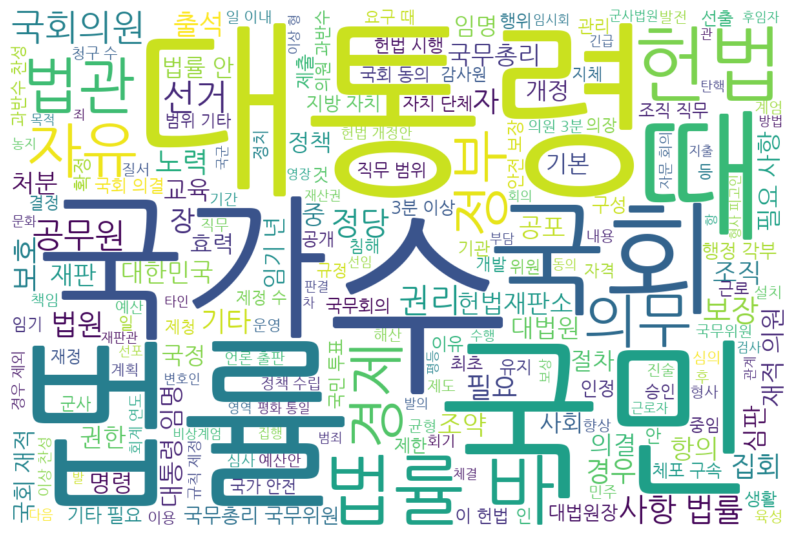

In [16]:
my_path='./fonts/NanumGothic.ttf'
fig = plt.figure(figsize=(10,10))

# 워드 클라우드 객체 설정
wordcloud = WordCloud(font_path=my_path,
                     background_color='white',
                     width=1200,
                     height=800).generate(text)

# 워드 클라우드 그리기
plt.imshow(wordcloud)

# interpolation='bilinear' #이미지를 화면에 표시할 때 픽셀 사이의 값을 보간하는 방법
plt.imshow(wordcloud.to_array(), interpolation='bilinear') # 가장 정확하고 안정적인 출력 방법
plt.axis('off') # 축 표시를 제거함
plt.show()

# 이미지 모양으로 워드 클라우드 그리기

## 마스킹 하기

In [17]:
import numpy as np
from PIL import Image

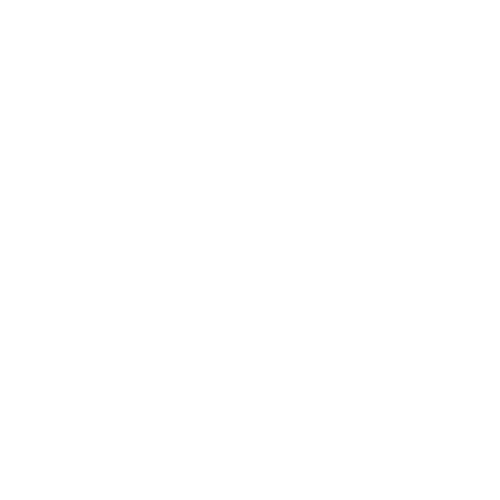

In [21]:
icon = Image.open('images/korea_map.png').convert('RGBA')
mask = Image.new('RGB', icon.size, (255,255,255)) # 흰색
# mask = Image.new("RGB", icon.size, (0,0,0))  # 검정색 (0~255)
mask

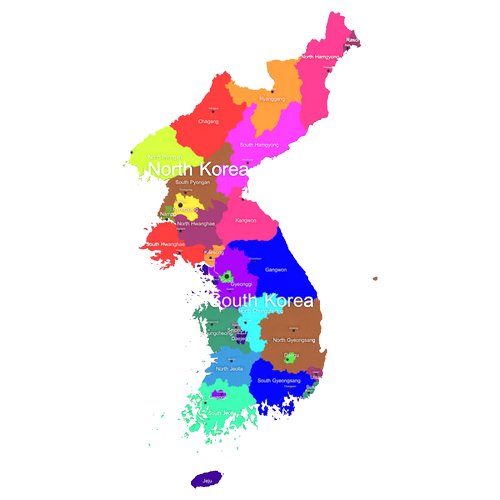

In [22]:
mask.paste(icon, icon)
mask

In [23]:
mask = np.array(mask)
mask.shape

(500, 500, 3)

## 워드클라우드 그리기

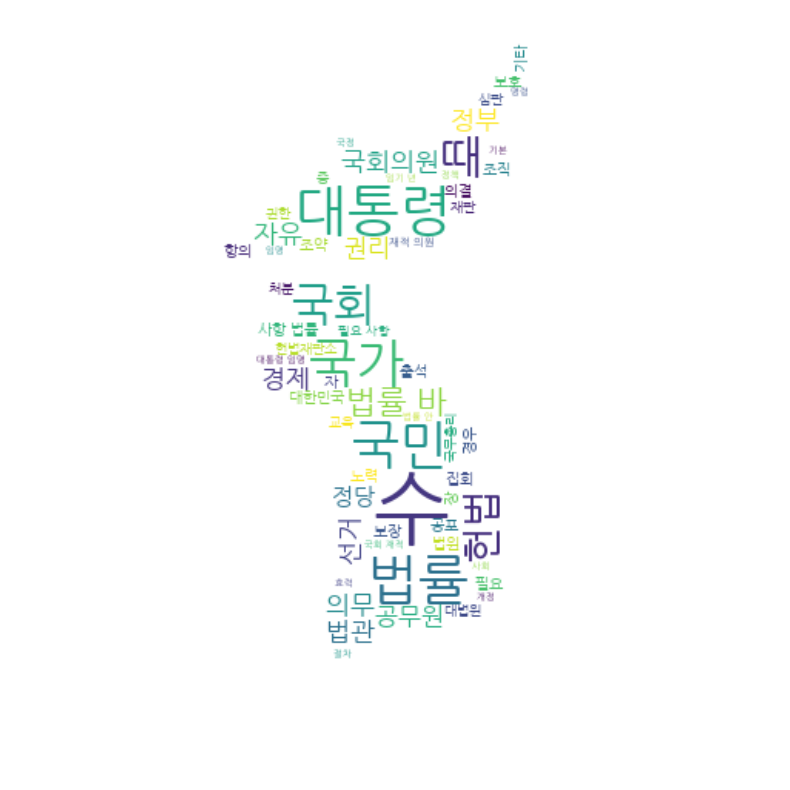

In [25]:
from PIL import Image

icon = Image.open('./images/korea_map.png').convert("RGBA")
mask = Image.new("RGB", icon.size, (255,255,255))
mask.paste(icon,icon) 
mask = np.array(mask)
wordcloud = WordCloud(font_path=my_path,
                      # background_color=None,
                      background_color='white',
                      width=1200,
                      height=800,
                      mask= mask).generate(text)

fig = plt.figure(figsize=(10,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

## 워드클라우드 그리기

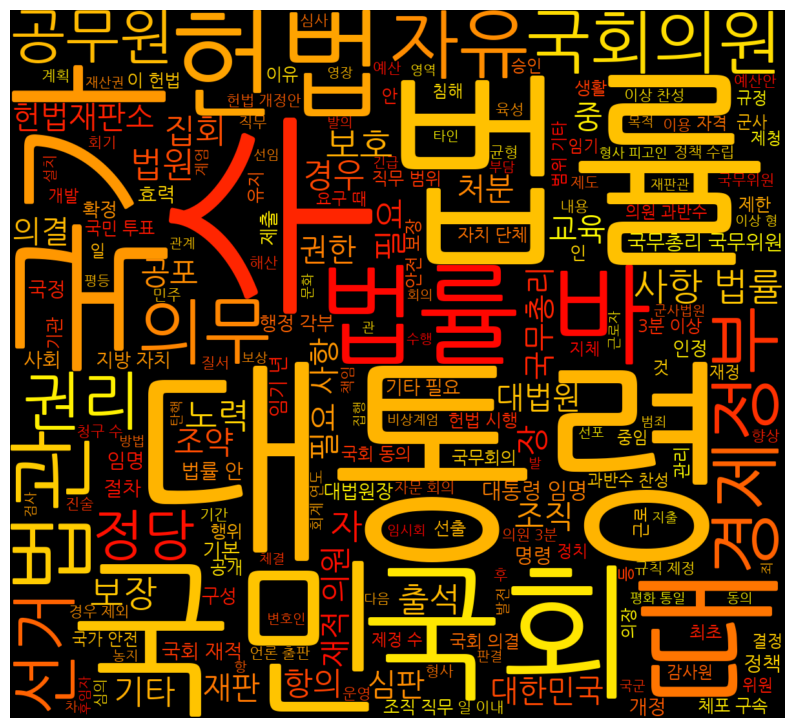

In [26]:
from PIL import Image
icon = Image.open('./images/heart.png').convert("RGBA")
mask = Image.new("RGB", icon.size, (255,255,255))
# mask.paste(icon,icon) 
mask.paste(icon) 
mask = np.array(mask)
wordcloud = WordCloud(font_path=my_path,
                      background_color=None,
                      width=1200,
                      height=800,
                      colormap='autumn',
                     mask= mask).generate(text)
fig = plt.figure(figsize=(10,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

In [27]:
wordcloud.to_file("test.png")

# 다른 데이터로 해보기

In [28]:
from wordcloud import WordCloud
from konlpy.tag import Komoran
import matplotlib.pyplot as plt
from konlpy.corpus import kolaw 

## 데이터 준비

In [31]:
from Korpora import Korpora
Korpora.fetch('korsts')

[korsts] download sts-train.tsv: 1.05MB [00:00, 5.06MB/s]                                                              
[korsts] download sts-dev.tsv: 311kB [00:00, 1.75MB/s]                                                                 
[korsts] download sts-test.tsv: 254kB [00:00, 1.36MB/s]                                                                


In [32]:
from Korpora import Korpora
corpus = Korpora.load('korsts')


    Korpora 는 다른 분들이 연구 목적으로 공유해주신 말뭉치들을
    손쉽게 다운로드, 사용할 수 있는 기능만을 제공합니다.

    말뭉치들을 공유해 주신 분들에게 감사드리며, 각 말뭉치 별 설명과 라이센스를 공유 드립니다.
    해당 말뭉치에 대해 자세히 알고 싶으신 분은 아래의 description 을 참고,
    해당 말뭉치를 연구/상용의 목적으로 이용하실 때에는 아래의 라이센스를 참고해 주시기 바랍니다.

    # Description
    Author : KakaoBrain
    Repository : https://github.com/kakaobrain/KorNLUDatasets
    References :
        - Ham, J., Choe, Y. J., Park, K., Choi, I., & Soh, H. (2020). KorNLI and KorSTS: New Benchmark
           Datasets for Korean Natural Language Understanding. arXiv preprint arXiv:2004.03289.
           (https://arxiv.org/abs/2004.03289)

    This is the dataset repository for our paper
    "KorNLI and KorSTS: New Benchmark Datasets for Korean Natural Language Understanding."
    (https://arxiv.org/abs/2004.03289)
    We introduce KorNLI and KorSTS, which are NLI and STS datasets in Korean.

    # License
    Creative Commons Attribution-ShareAlike license (CC BY-SA 4.0)
    Details in https://creativecommons.org/licenses

## 형태소 추출

In [34]:
# 말뭉치의 텍스트 부분만 추출
train_texts = corpus.train
# dev_texts  = corpus.dev
# test_texts = corpus.
train_texts =  train_texts.texts

In [35]:
# 말뭉치를 텍스트로 만들기
text_corpus = ' '.join(train_texts)
print(type(text_corpus))
text_corpus[:200]

<class 'str'>


'비행기가 이륙하고 있다. 한 남자가 큰 플루트를 연주하고 있다. 한 남자가 피자에 치즈를 뿌려놓고 있다. 세 남자가 체스를 하고 있다. 한 남자가 첼로를 연주하고 있다. 몇몇 남자들이 싸우고 있다. 남자가 담배를 피우고 있다. 남자가 피아노를 치고 있다. 한 남자가 기타를 치고 노래를 부르고 있다. 사람이 고양이를 천장에 던지고 있다. 그 남자는 다른 남자'

In [36]:
# 형태소 추출: 시간이 좀 걸림(5분정도)
tagger = Komoran()
nouns = tagger.nouns(text_corpus)

## 문자열로 만들기

In [37]:
# 추출한 형태로소를 ,로 구분하기
text2 = ', '.join(nouns)
text2[:20]

'비행기, 이륙, 남자, 플루트, 연주'

## 워드클라우드 그리기

(np.float64(-0.5), np.float64(1199.5), np.float64(799.5), np.float64(-0.5))

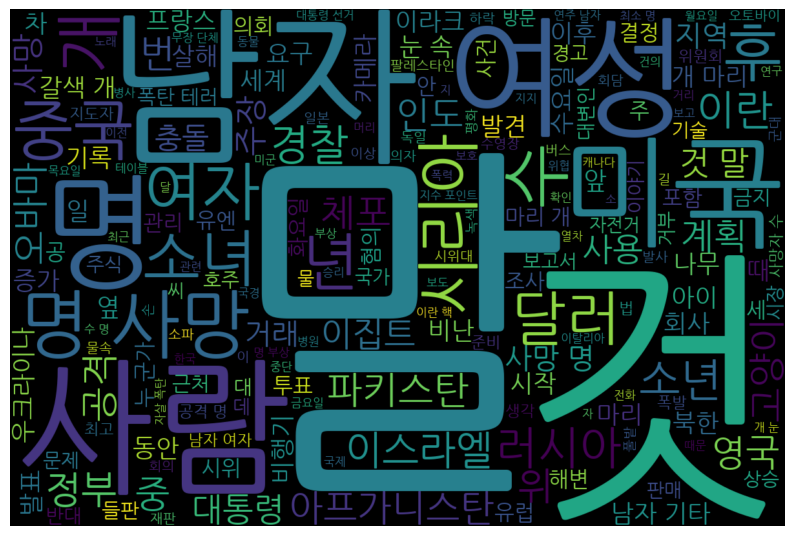

In [38]:
# 클라우딩 객체 설정
wordcloud = WordCloud(font_path=my_path, 
                      background_color=None, 
                      width=1200, 
                      height=800).generate(text2)
fig = plt.figure(figsize=(10,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')

# Korpora 데이터 활용

In [39]:
from wordcloud import WordCloud
from konlpy.tag import Komoran
import matplotlib.pyplot as plt

In [40]:
from Korpora import Korpora